<a href="https://colab.research.google.com/github/Molten-Ice/Kaggle/blob/dev/02_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data
import sklearn
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=3)
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[-0.14262555,  0.76735775],
        [-0.80555499, -0.08834659],
        [ 0.33596039, -0.65704399],
        [-0.77683638,  0.57673511],
        [ 0.37742784,  0.69483248]]), array([1, 1, 1, 0, 1]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,-0.142626,0.767358,1
1,-0.805555,-0.088347,1
2,0.335960,-0.657044,1
3,-0.776836,0.576735,0
4,0.377428,0.694832,1
5,-0.661527,-0.430946,1
6,-0.297184,0.735692,1
7,-0.796143,-0.035503,1
8,0.466002,-0.934256,0
9,1.019159,-0.031567,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

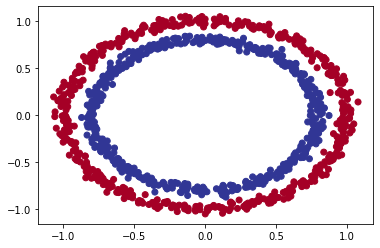

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample: {X_sample}, {y_sample}")

Values for one sample: [-0.14262555  0.76735775], 1


In [ ]:
import torch
torch.__version__

'1.13.1+cu116'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[-0.1426,  0.7674],
         [-0.8056, -0.0883],
         [ 0.3360, -0.6570],
         [-0.7768,  0.5767],
         [ 0.3774,  0.6948]]), tensor([1., 1., 1., 0., 1.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features = 5, out_features = 1))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.two_linear_layers(x)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight', tensor([[ 0.2892, -0.4318],
                      [ 0.0841, -0.2886],
                      [ 0.6154,  0.5643],
                      [ 0.2689,  0.3000],
                      [-0.4219, -0.0197]])),
             ('two_linear_layers.0.bias',
              tensor([-0.2522, -0.0799,  0.3324,  0.3835, -0.6891])),
             ('two_linear_layers.1.weight',
              tensor([[ 0.3289,  0.4205, -0.0117,  0.0674, -0.3272]])),
             ('two_linear_layers.1.bias', tensor([-0.3974]))])

In [ ]:
with torch.inference_mode():

  untrained_preds = model_0(X_test.to(device))
nn.L1Loss()(untrained_preds.squeeze(), y_test).detach()

tensor(0.7988)

In [ ]:
untrained_preds[:5], y_test[:5]

(tensor([[-0.4176],
         [-0.5984],
         [ 0.0901],
         [-0.5283],
         [-0.3793]]), tensor([1., 0., 0., 1., 1.]))

In [ ]:
#Normal BCE required it to have already gone through sigmoid layer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
accuracy_fn(untrained_preds[:5], y_test[:5])

0.0

In [ ]:
#Training loop

# 1. Forward pass
# 2. Calculate the loss
# 3. Optimizer zero grad
# 4. Loss backward backpropagation)
# 5. Optimizer step (gradient desccent)

In [ ]:
# raw logits -> predicition probabilities -> prediction labels

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.4176],
        [-0.5984],
        [ 0.0901],
        [-0.5283],
        [-0.3793]])

In [ ]:
len(y_logits)

200

In [ ]:
m = nn.Softmax(dim=0)
m(y_logits[:5])

tensor([[0.1842],
        [0.1537],
        [0.3060],
        [0.1648],
        [0.1913]])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.3971],
        [0.3547],
        [0.5225],
        [0.3709],
        [0.4063]])

In [ ]:
#find predicted labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
accuracy_fn(y_pred_labels.squeeze(), y_test)

43.0

# Full code (my attempt)

On device: cuda


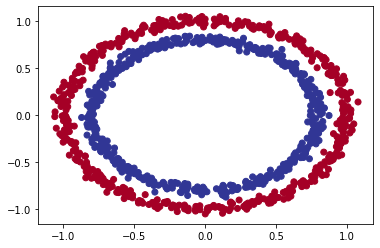

In [8]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn


torch.manual_seed(3)
torch.cuda.manual_seed(3)

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=3)
# circles = pd.DataFrame({"X1": X[:, 0],
#                         "X2": X[:, 1],
#                         "label": y})
# circles.head(5)
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"On device: {device}")

#GIVEN X, y
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# class CircleModelV0(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.two_linear_layers = nn.Sequential(
#         nn.Linear(in_features=2, out_features=10),
#         nn.Linear(in_features=10, out_features=10),
#         nn.Linear(in_features=10, out_features=1))
    
#   def forward(self, x: torch.Tensor) -> torch.Tensor:
#     return self.two_linear_layers(x)

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=5)
    self.layer_3 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_0 = CircleModelV0().to(device)
model_0.to(device)

#Normal BCE required it to have already gone through sigmoid layer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [9]:
epochs = 3000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  #Training loop
  model_0.train()
  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/accuacy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward backpropagation)
  loss.backward()
  # 5. Optimizer step (gradient desccent)
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_acc = accuracy_fn(y_true=y_test,
                          y_pred = test_pred)
  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train accuracy: {acc:.3f} | Test accuracy: {test_acc:.3f} | Loss: {loss:.5f}")

Epoch: 0 | Train accuracy: 49.500 | Test accuracy: 52.000 | Loss: 0.70194
Epoch: 50 | Train accuracy: 49.500 | Test accuracy: 52.000 | Loss: 0.69050
Epoch: 100 | Train accuracy: 63.000 | Test accuracy: 55.000 | Loss: 0.68880
Epoch: 150 | Train accuracy: 58.500 | Test accuracy: 49.500 | Loss: 0.68783
Epoch: 200 | Train accuracy: 59.000 | Test accuracy: 49.000 | Loss: 0.68672
Epoch: 250 | Train accuracy: 59.000 | Test accuracy: 49.000 | Loss: 0.68544
Epoch: 300 | Train accuracy: 59.500 | Test accuracy: 49.500 | Loss: 0.68389
Epoch: 350 | Train accuracy: 59.250 | Test accuracy: 49.500 | Loss: 0.68205
Epoch: 400 | Train accuracy: 60.875 | Test accuracy: 50.500 | Loss: 0.67984
Epoch: 450 | Train accuracy: 62.000 | Test accuracy: 54.000 | Loss: 0.67688
Epoch: 500 | Train accuracy: 62.250 | Test accuracy: 56.500 | Loss: 0.67342
Epoch: 550 | Train accuracy: 63.375 | Test accuracy: 57.000 | Loss: 0.66943
Epoch: 600 | Train accuracy: 66.250 | Test accuracy: 59.000 | Loss: 0.66478
Epoch: 650 | Tr

Epoch: 50 | Train accuracy: 50.5 | Test accuracy: 48.0

Epoch: 60 | Train accuracy: 50.5 | Test accuracy: 48.0

Epoch: 70 | Train accuracy: 50.5 | Test accuracy: 48.0

Epoch: 80 | Train accuracy: 50.5 | Test accuracy: 48.0

Epoch: 90 | Train accuracy: 50.5 | Test accuracy: 48.0

In [23]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

# Training doesn't work, time to visualize

In [5]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [6]:
from helper_functions import plot_predictions, plot_decision_boundary

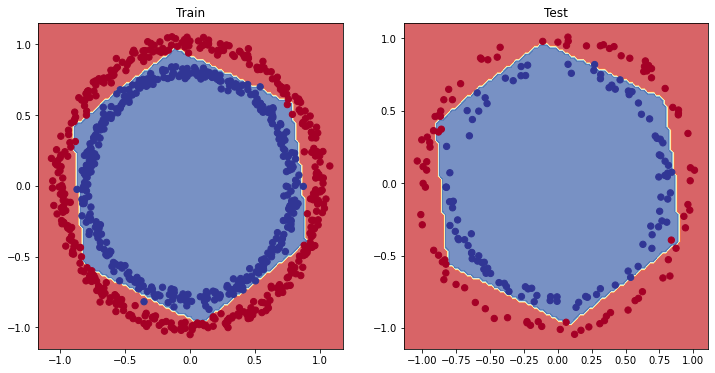

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

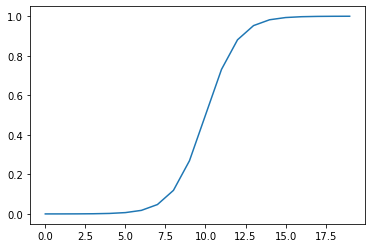

In [11]:
A = torch.arange(-10, 10, 1, dtype = torch.float32)
def sigmoid(x):
  return 1 + (1 + torch.exp(-x))
plt.plot(torch.sigmoid(A))

# Multi-class classification problem

Ways to imrpove a model:

- Adding layers
- Increasing the number of hidden units
- Change/add activation functions
- Change the optimization function (SGD/ ADAM)
- Change the learning rate
- Fitting for longer

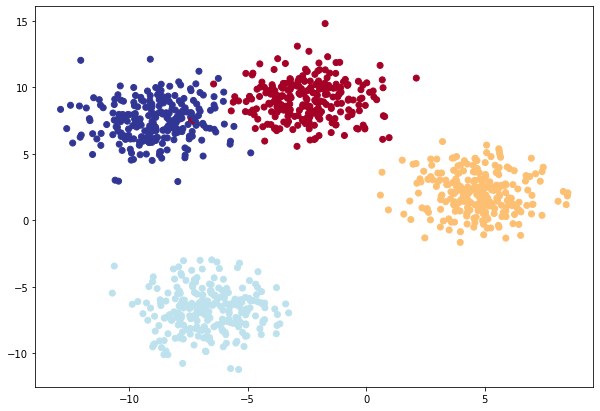

In [18]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap=plt.cm.RdYlBu)